<a href="https://colab.research.google.com/github/nandiniranjansinha/Prasunet_DS_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')

# Display the first few rows of each dataset
print("Training Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())
print("\nGender Submission Data:")
print(gender_submission_df.head())


Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [ ]:
# Data types and summary statistics for the training data
print("Training Data Info:")
print(train_df.info())
print("\nTraining Data Description:")
print(train_df.describe())

# Data types and summary statistics for the test data
print("\nTest Data Info:")
print(test_df.info())
print("\nTest Data Description:")
print(test_df.describe())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Training Data Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699

In [ ]:
# Check for missing values in the training data
print("Missing Values in Training Data:")
print(train_df.isnull().sum())

# Handle missing values (example: fill missing 'Age' with median, drop 'Cabin' due to too many missing values)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)

# Repeat for test data
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Check again for missing values
print("\nMissing Values in Training Data After Handling:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Data After Handling:")
print(test_df.isnull().sum())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing Values in Training Data After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values in Test Data After Handling:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int

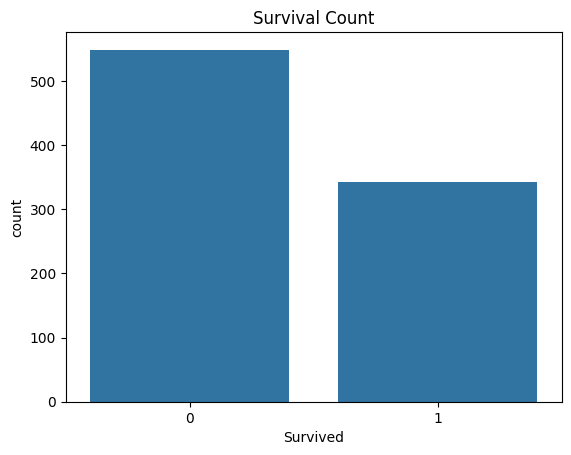

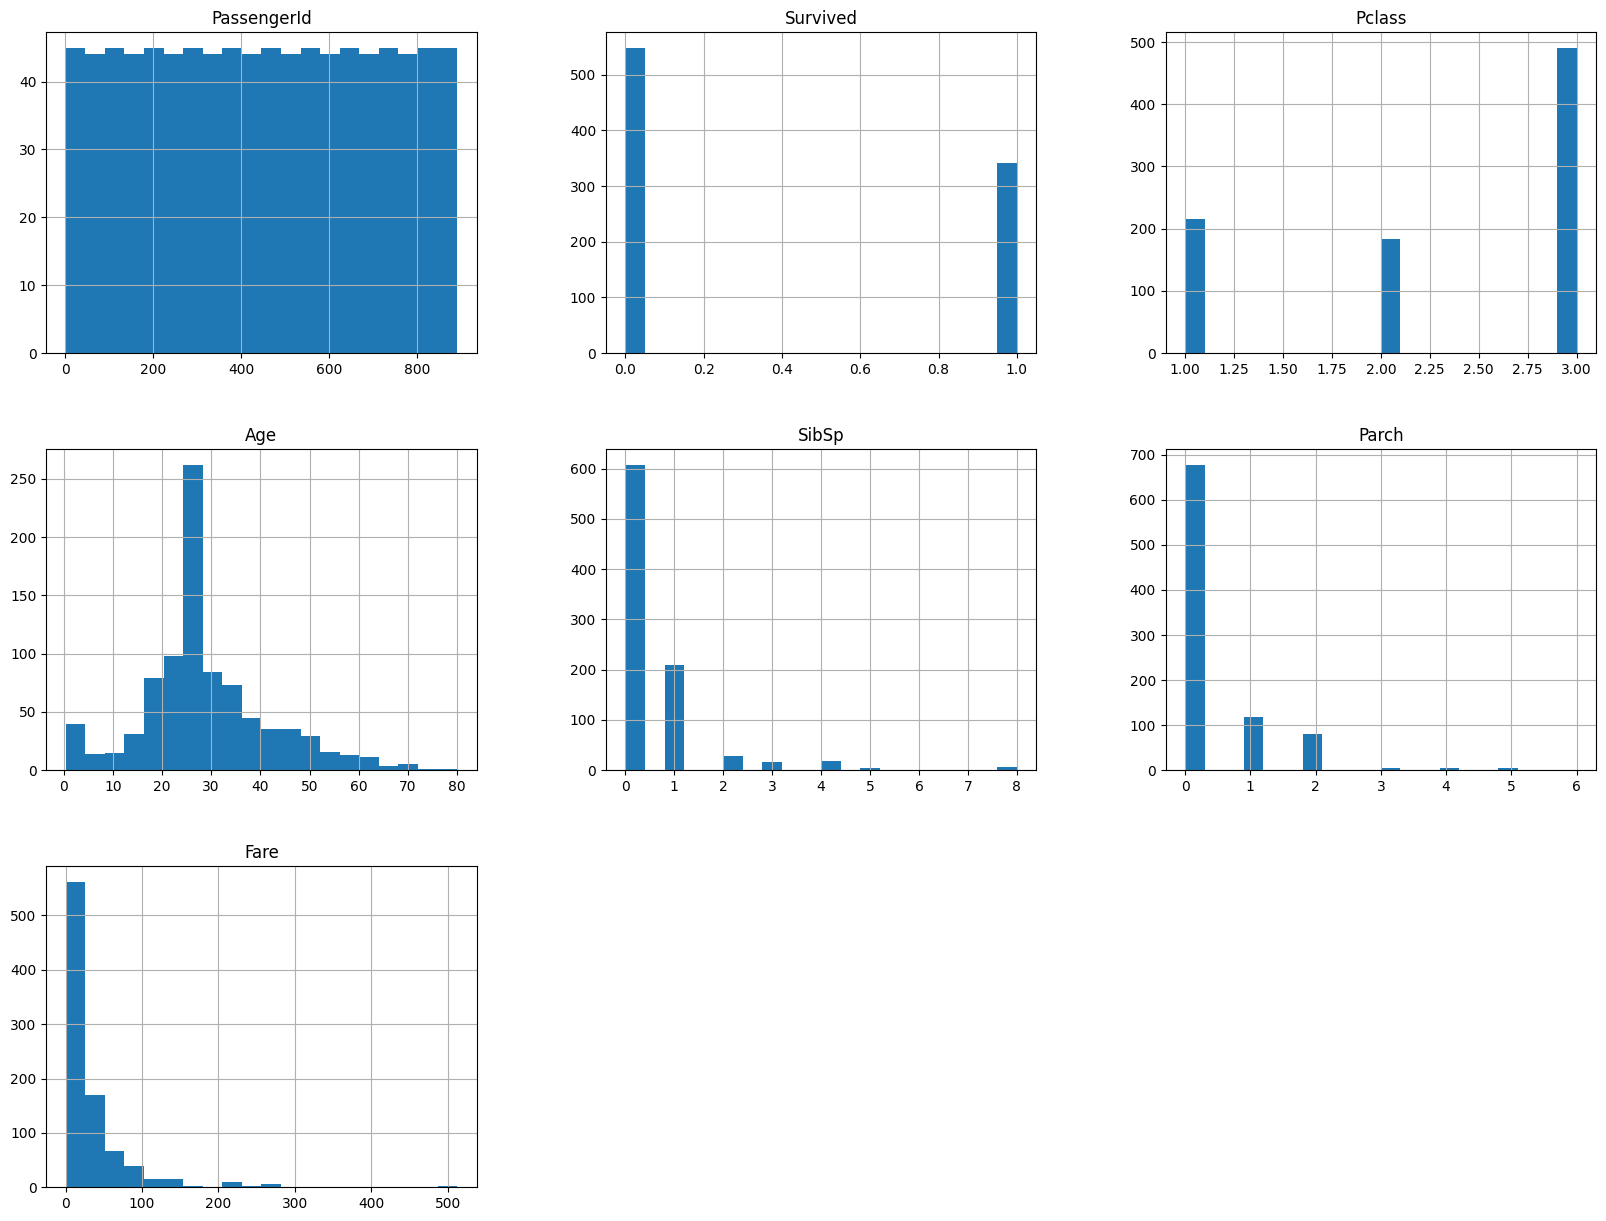

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis for the target variable 'Survived'
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

# Distribution of numerical features
train_df.hist(bins=20, figsize=(20,15))
plt.show()


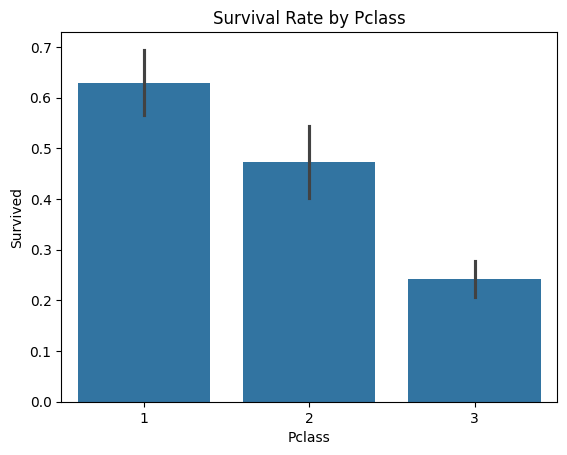

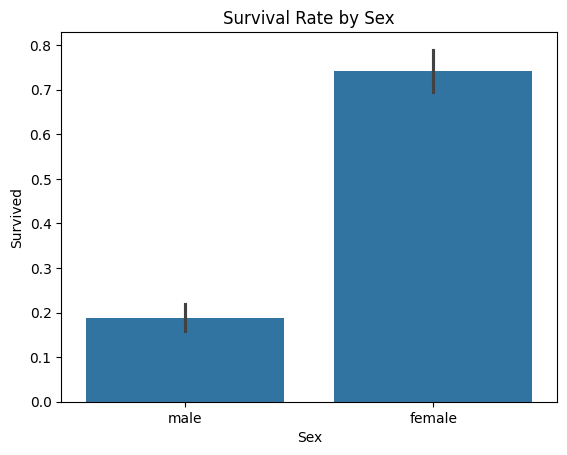

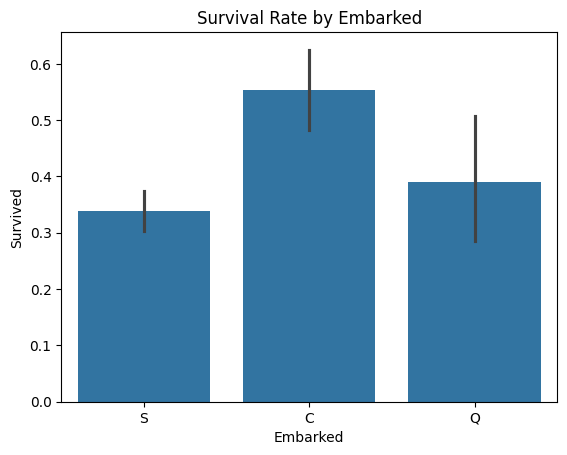

In [ ]:
# Survival rate by 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by 'Sex'
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by 'Embarked'
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.show()


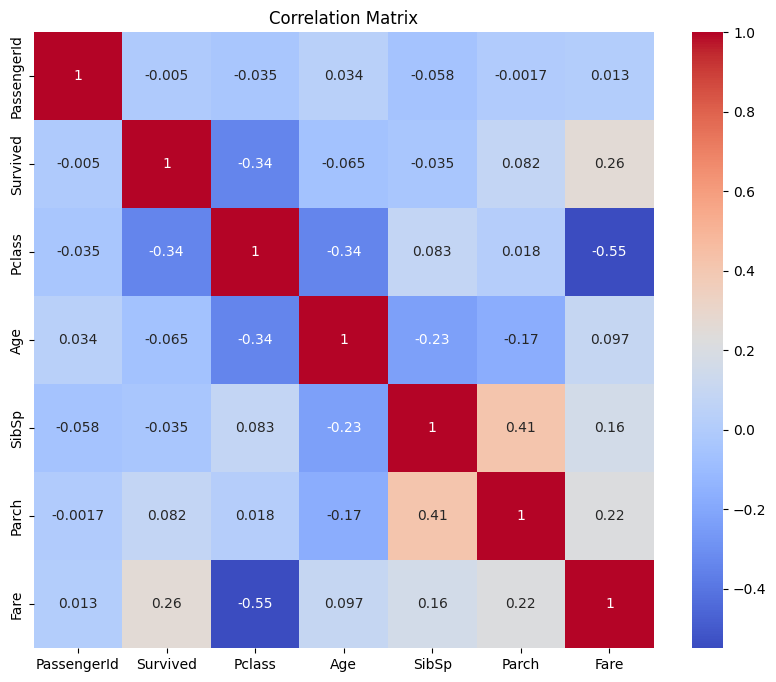

In [ ]:
# Select numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numeric columns
corr_matrix = train_df[numeric_cols].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
